#### Overview ####

TeleConnect, a telecommunications provider, wants to proactively identify customers likely to cancel their services. They've provided historical data about customers who have stayed with or left the company. Your task is to build a decision tree model that can predict which current customers might churn, allowing the retention team to intervene early.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [2]:
# Load and prepare our data
# In a real scenario, this would be your company's customer data
telecom_data = pd.DataFrame({
    'monthly_charges': [70, 55, 85, 45, 95, 65, 75, 90, 50, 80],
    'tenure_months': [24, 12, 36, 6, 48, 18, 30, 42, 9, 15],
    'total_gb_used': [100, 50, 150, 25, 200, 75, 125, 175, 30, 80],
    'customer_service_calls': [1, 3, 0, 4, 1, 2, 1, 0, 5, 2],
    'churned': [0, 1, 0, 1, 0, 0, 0, 0, 1, 1]
})

In [3]:
# Split features and target
X = telecom_data.drop('churned', axis=1)
y = telecom_data['churned']

In [5]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Instantiate model
dt_model = DecisionTreeClassifier(
   max_depth=3,
   min_samples_leaf=2,
   random_state=42
)

In [7]:
# Train the model
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

Model Accuracy: 1.00


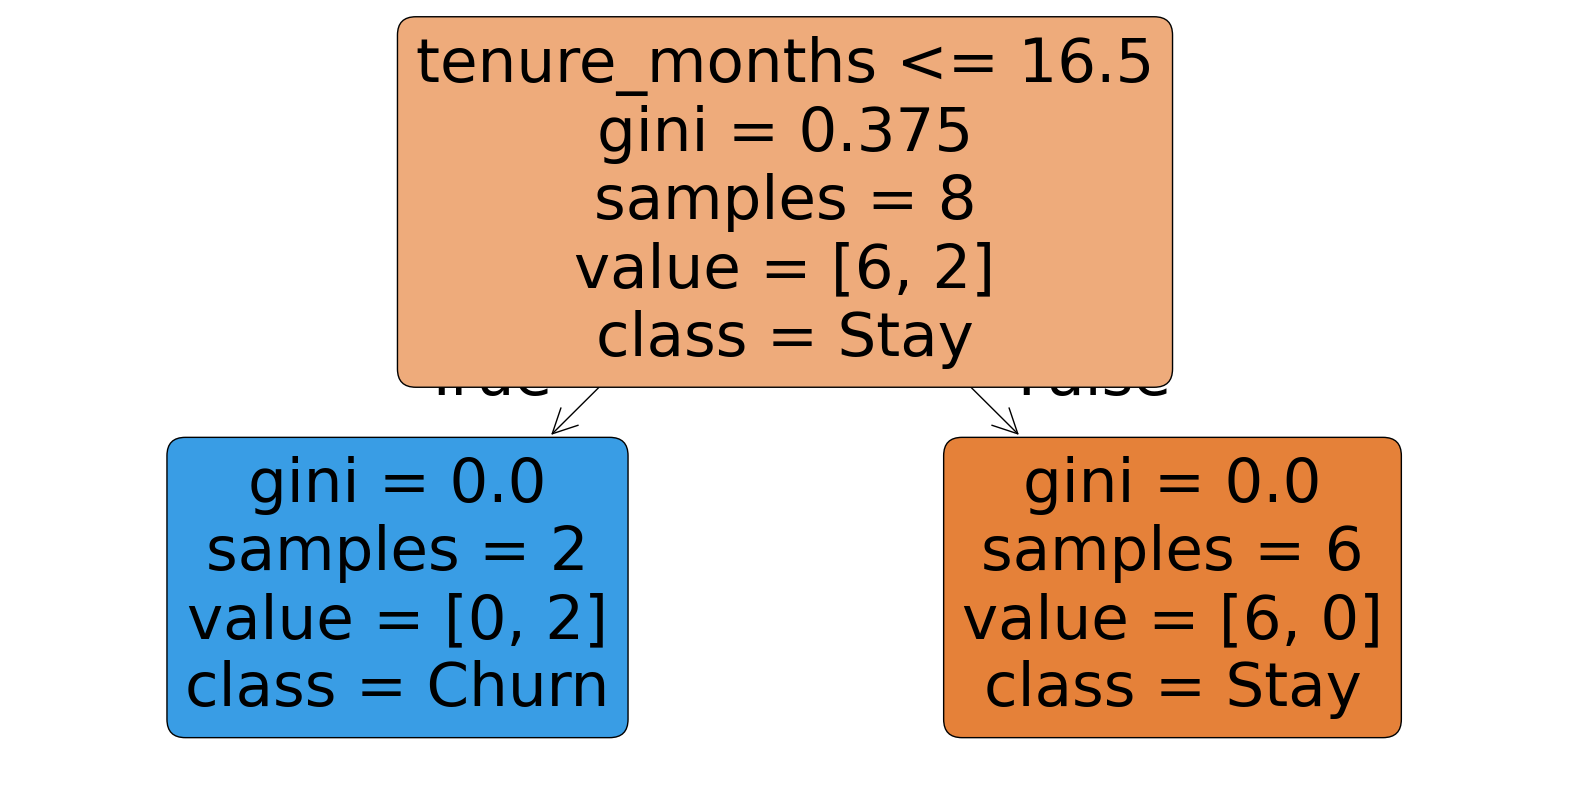

In [8]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Visualize the tree
plt.figure(figsize=(20,10))
plot_tree(dt_model, 
          feature_names=X.columns,
          class_names=['Stay', 'Churn'],
          filled=True,
          rounded=True)
plt.show()

In [9]:
# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': dt_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
                  feature  importance
1           tenure_months         1.0
0         monthly_charges         0.0
2           total_gb_used         0.0
3  customer_service_calls         0.0


In [10]:
# Extracting feature importance from model and aligning with feature columns
for feature, importance in zip(X.columns, dt_model.feature_importances_):
   n_nodes = sum([1 for i in range(dt_model.tree_.node_count)
                  if dt_model.tree_.feature[i] == X.columns.get_loc(feature)])
  
   print(f"\nFeature: {feature}")
   print(f"Importance Score: {importance:.3f}")
   print(f"Used in {n_nodes} nodes")


Feature: monthly_charges
Importance Score: 0.000
Used in 0 nodes

Feature: tenure_months
Importance Score: 1.000
Used in 1 nodes

Feature: total_gb_used
Importance Score: 0.000
Used in 0 nodes

Feature: customer_service_calls
Importance Score: 0.000
Used in 0 nodes


#### Discussion ####

While this is a very simple and straightforward example, let's break down what's happening in this code and how it relates to our earlier theoretical discussion:

1. Data Preparation: We have four features that might predict churn:
    - monthly_charges: How much the customer pays each month
    - tenure_months: How long they've been a customer
    - total_gb_used: Their data usage
    - customer_service_calls: Number of times they've contacted support
2. Model Creation: Notice how we set max_depth=3 and min_samples_leaf=2. These are our first steps in preventing overfitting. We're telling the tree:
    - Don't create more than 3 levels of decisions
    - Don't create groups smaller than 2 customers
3. Training Process: During training, the tree uses the greedy algorithm we discussed to:
    - Evaluate all possible splits on each feature.
    - Choose the split that best separates churned from non-churned customers.
    - Repeat this process for each resulting group until reaching our stopping criteria.
4. Making Predictions: For a new customer, the tree will:
    - Start at the root node.
    - Compare the customer's values to each decision node.
    - Follow the appropriate path until reaching a leaf node.
    - Predict churn based on the majority class in that leaf.

### Predicting a New Customer's Churn Likelihood ####

In [11]:
new_customer = pd.DataFrame({
    'monthly_charges': [82],
    'tenure_months': [3],
    'total_gb_used': [120],
    'customer_service_calls': [4]
})

prediction = dt_model.predict(new_customer)
probability = dt_model.predict_proba(new_customer)

print(f"Churn Prediction: {'Yes' if prediction[0] == 1 else 'No'}")
print(f"Probability of Churn: {probability[0][1]:.2f}")

Churn Prediction: Yes
Probability of Churn: 1.00


#### Notes on Presenting to Stakeholders ####

- Identify key factors influencing churn (feature importance)
- Provide clear decision rules that nontechnical users will undersatnd
- Give probability scores to help prioritize efforts